# **LAB 6 - Quadratic Equation: Classic & Po Shen Loh**

Juan Esteban Alarcón Bravo
$$ $$

---

## Modification to plot a square in the complex palne with center in (z_c_r, z_c_i) and of size zw x zh 

Modfied from Fractals with Python - The Newton Set https://blog.anvetsu.com/posts/fractals-newton-python-matplotlib-numpy/
from the Fractals with Python series https://blog.anvetsu.com/tags/fractal/

German Hernandez

![picture](https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Z3_1centermap.png)

In [1]:
import math
import cmath
import matplotlib.pyplot as plt
import numpy as np

# $x^2$

In [2]:
def f(z):
    return z ** 2

def df(z):
    return 2 * z

## **1. Function Plot**

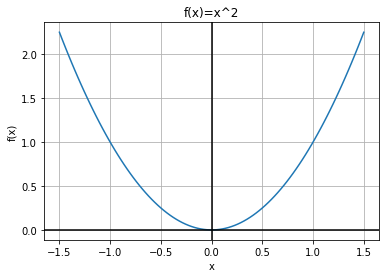

In [3]:
x = np.linspace(-1.5,1.5,100)
fig, ax = plt.subplots()
ax.plot(x,f(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=x^2')
plt.xlabel('x')
plt.ylabel('f(x)');




## **2. Classic & Po-Shen Loh's Methods**

In [4]:
# Classic Method

def classic (a,b,c):
  d = (b**2) - (4*a*c)
  return [(-b-cmath.sqrt(d))/(2*a), (-b+cmath.sqrt(d))/(2*a)]

In [5]:
# Po-Shen Loh's Method

def poshenlo (b):
  t = (-b)/2
  u = cmath.sqrt(t**2 - c)
  return [t - u, t + u]

In [6]:
a = 1
b = 0
c = 0

In [7]:
# Solutions

s1A = classic(a,b,c)[0]
s2A = classic(a,b,c)[1]

s1B = poshenlo(b)[0]
s2B = poshenlo(b)[1]

if (s1A != s2A):
  print('Solutions using Classic Method:\n{0}\n{1}\n'.format(s1A,s2A))
  print('Solutions using Po-Shen Loh\'s Method:\n{0}\n{1}'.format(s1B,s2B))
else:
  print('Solution using Classic Method:\n{0}\n'.format(s1A))
  print('Solution using Po-Shen Loh\'s Method:\n{0}'.format(s1B))


Solution using Classic Method:
0j

Solution using Po-Shen Loh's Method:
0j


## **3. Newton Fractals**

In [8]:
def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256, eps = 1e-3):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative

    # Bounding roots
    r1 = 1
    r2 = -1

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 10

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256, eps = 1e-3):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter, eps=eps)
    plt.title('Newton Fractal f(x)=Z^2')
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()


zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


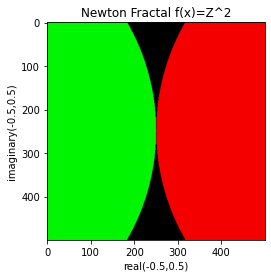

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


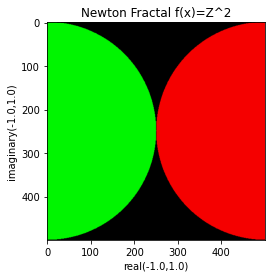

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


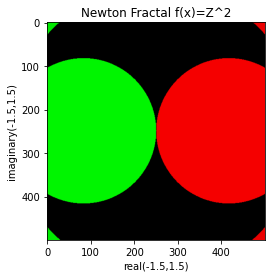

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


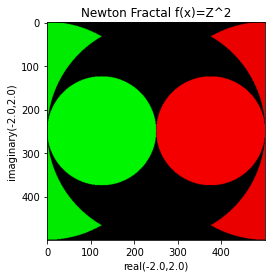

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


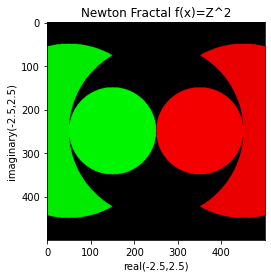

In [9]:
print("zoom out")
display1(zoom=1, eps = 1)
display1(zoom=2, eps = 1)
display1(zoom=3, eps = 1)
display1(zoom=4, eps = 1)
display1(zoom=5, eps = 1)

zoom in
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


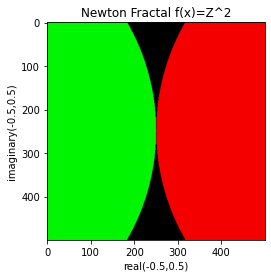

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


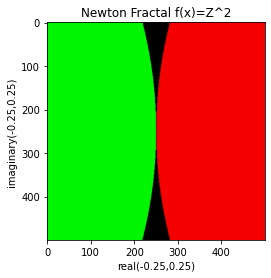

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


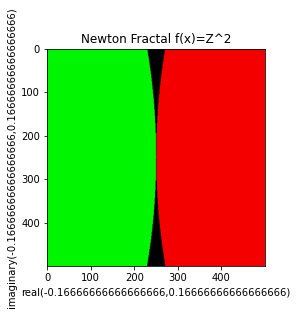

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


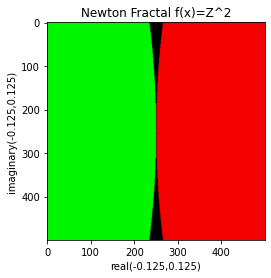

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


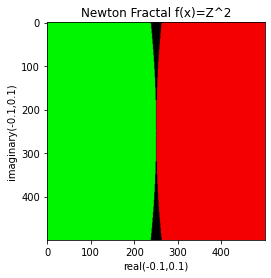

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


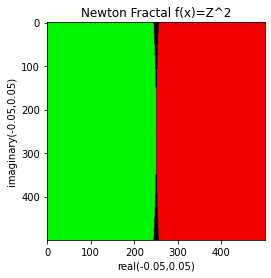

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


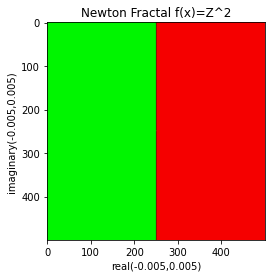

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


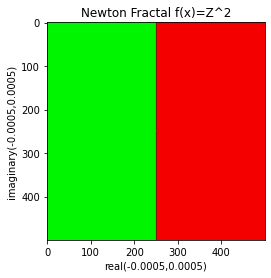

In [10]:
print("zoom in")
display1(zoom=1, eps = 1)
display1(zoom=1/2, eps = 1)
display1(zoom=1/3, eps = 1)
display1(zoom=1/4, eps = 1)
display1(zoom=1/5, eps = 1)
display1(zoom=1/10, eps = 1)
display1(zoom=1/100, eps = 1)
display1(zoom=1/1000, eps = 1)

## **4. Newton Iterates**

### Newton iterates form $z=10.0 + 0.0j$

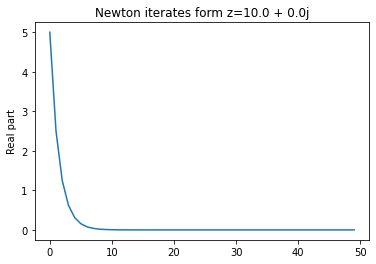

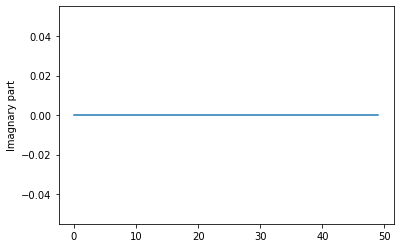

In [11]:
z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

### Newton iterates form $z=-10.0 + 0.0j$

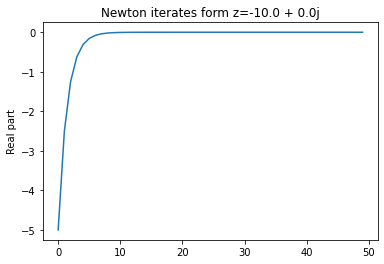

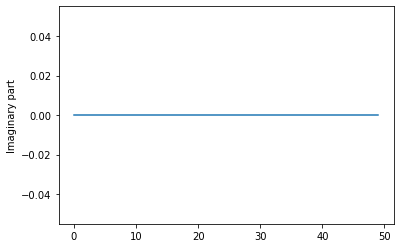

In [12]:
z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

### Newton iterates form $z=0.0 + 10.0j$

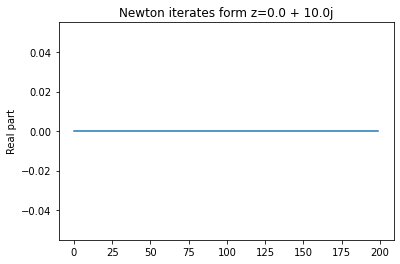

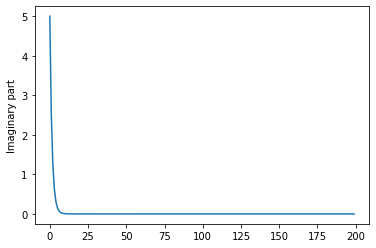

In [13]:
z=-0.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

### Newton iterates form $z=0.0 - 10.0j$

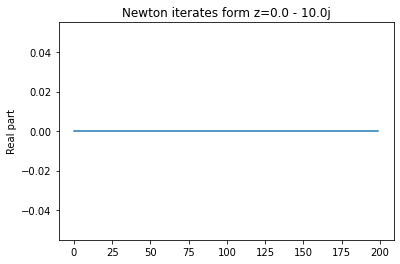

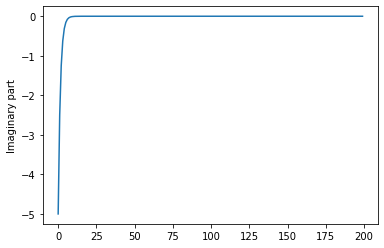

In [14]:
z=-0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

### Newton iterates form $z=0.0 + 0.0j$

In [15]:
z=-0.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

ZeroDivisionError: ignored

# $(x-1)^2$

In [16]:
def f(z):
    return (z-1) ** 2

def df(z):
    return 2 * (z-1)

## **1. Function Plot**

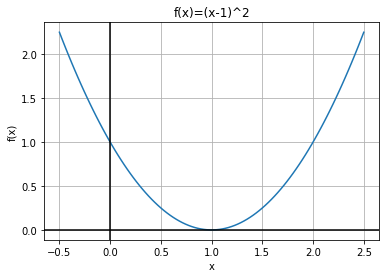

In [17]:
x = np.linspace(-0.5,2.5,100)
fig, ax = plt.subplots()
ax.plot(x,f(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=(x-1)^2')
plt.xlabel('x')
plt.ylabel('f(x)');




## **2. Classic & Po-Shen Loh's Methods**

In [18]:
a = 1
b = -2
c = 1

In [19]:
# Solutions

s1A = classic(a,b,c)[0]
s2A = classic(a,b,c)[1]

s1B = poshenlo(b)[0]
s2B = poshenlo(b)[1]

if (s1A != s2A):
  print('Solutions using Classic Method:\n{0}\n{1}\n'.format(s1A,s2A))
  print('Solutions using Po-Shen Loh\'s Method:\n{0}\n{1}'.format(s1B,s2B))
else:
  print('Solution using Classic Method:\n{0}\n'.format(s1A))
  print('Solution using Po-Shen Loh\'s Method:\n{0}'.format(s1B))


Solution using Classic Method:
(1+0j)

Solution using Po-Shen Loh's Method:
(1+0j)


## **3. Newton Fractals**

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


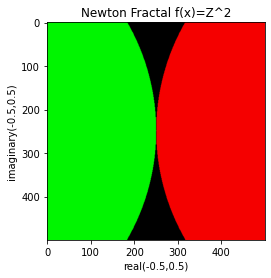

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


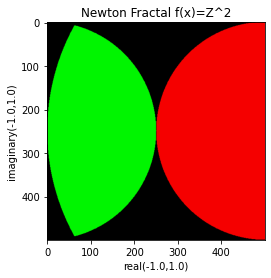

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


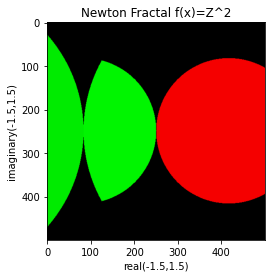

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


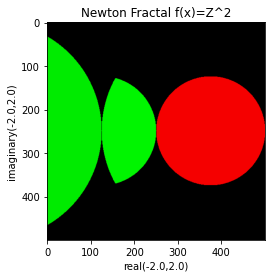

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


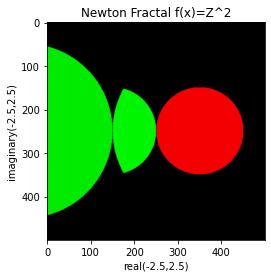

In [20]:
print("zoom out")
display1(zoom=1, eps = 1)
display1(zoom=2, eps = 1)
display1(zoom=3, eps = 1)
display1(zoom=4, eps = 1)
display1(zoom=5, eps = 1)

zoom in
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


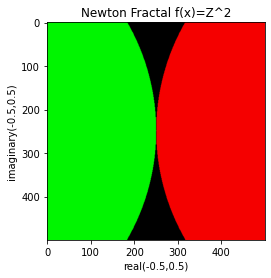

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


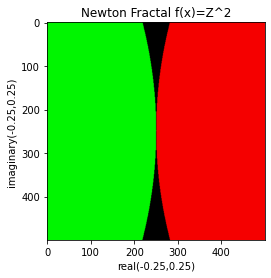

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


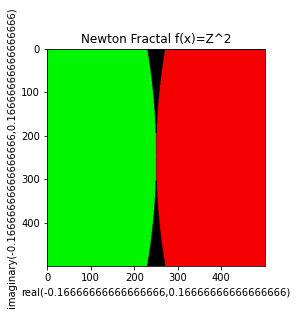

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


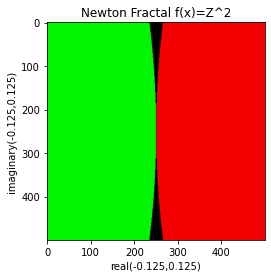

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


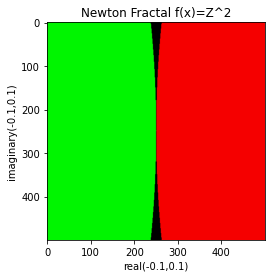

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


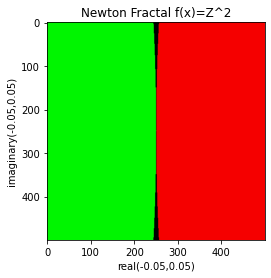

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


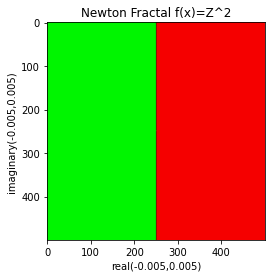

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


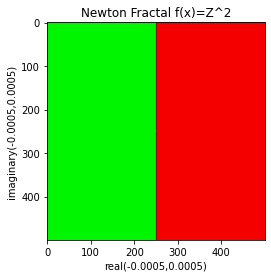

In [21]:
print("zoom in")
display1(zoom=1, eps = 1)
display1(zoom=1/2, eps = 1)
display1(zoom=1/3, eps = 1)
display1(zoom=1/4, eps = 1)
display1(zoom=1/5, eps = 1)
display1(zoom=1/10, eps = 1)
display1(zoom=1/100, eps = 1)
display1(zoom=1/1000, eps = 1)

## **4. Newton Iterates**

### Newton iterates form $z=10.0 + 0.0j$

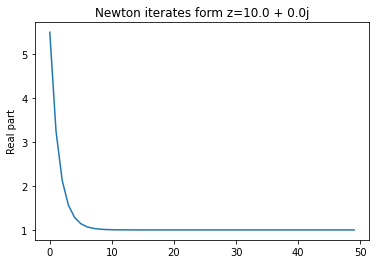

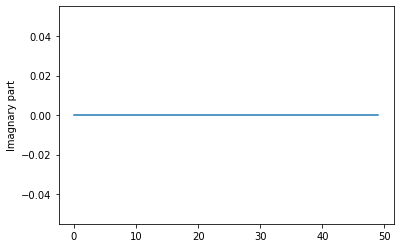

In [22]:
z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

### Newton iterates form $z=-10.0 + 0.0j$

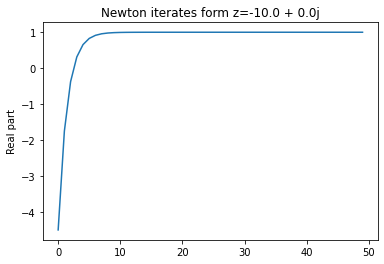

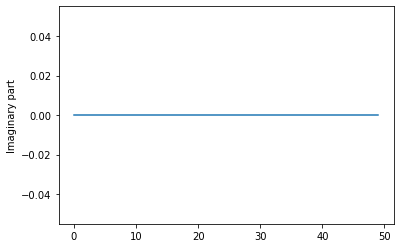

In [23]:
z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

### Newton iterates form $z=0.0 + 10.0j$

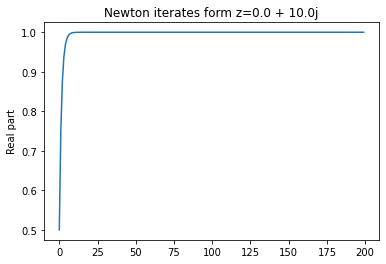

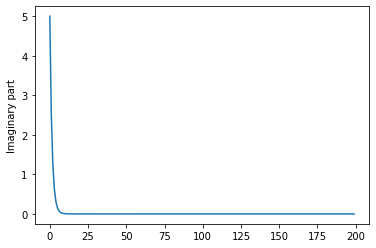

In [24]:
z=-0.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

### Newton iterates form $z=0.0 - 10.0j$

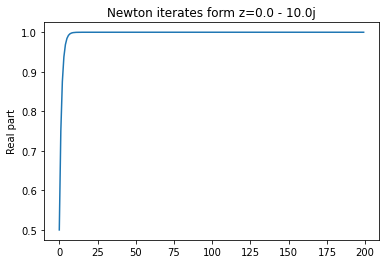

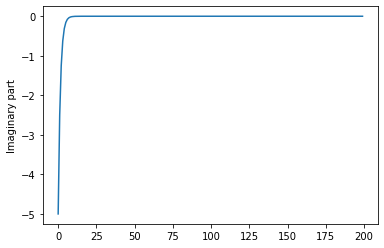

In [25]:
z=-0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

### Newton iterates form $z=0.0 + 0.0j$

In [26]:
z=-0.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

ZeroDivisionError: ignored

# $x^2-1$

In [27]:
def f(z):
    return z ** 2 - 1

def df(z):
    return 2 * z

## **1. Function Plot**

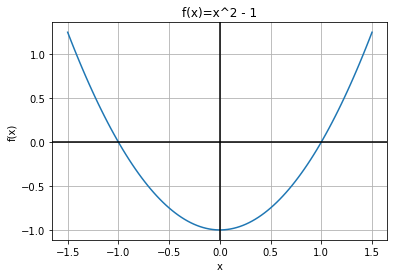

In [28]:
x = np.linspace(-1.5,1.5,100)
fig, ax = plt.subplots()
ax.plot(x,f(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=x^2 - 1')
plt.xlabel('x')
plt.ylabel('f(x)');




## **2. Classic & Po-Shen Loh's Methods**

In [29]:
a = 1
b = 0
c = -1

In [30]:
# Solutions

s1A = classic(a,b,c)[0]
s2A = classic(a,b,c)[1]

s1B = poshenlo(b)[0]
s2B = poshenlo(b)[1]

if (s1A != s2A):
  print('Solutions using Classic Method:\n{0}\n{1}\n'.format(s1A,s2A))
  print('Solutions using Po-Shen Loh\'s Method:\n{0}\n{1}'.format(s1B,s2B))
else:
  print('Solution using Classic Method:\n{0}\n'.format(s1A))
  print('Solution using Po-Shen Loh\'s Method:\n{0}'.format(s1B))


Solutions using Classic Method:
(-1+0j)
(1+0j)

Solutions using Po-Shen Loh's Method:
(-1+0j)
(1+0j)


## **3. Newton Fractals**

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


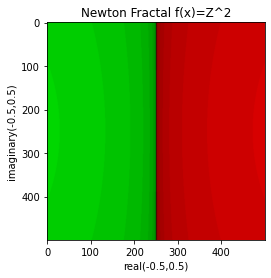

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


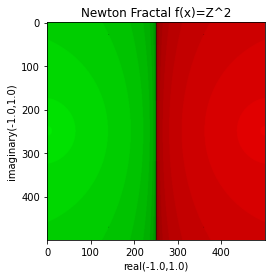

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


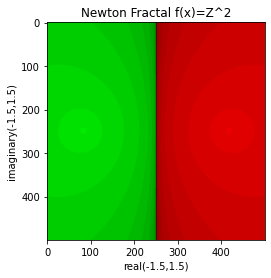

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


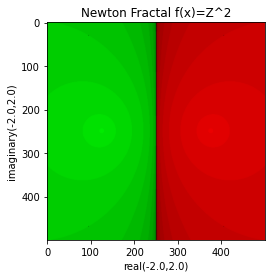

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


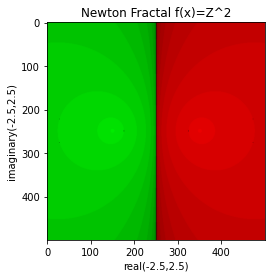

In [31]:
print("zoom out")
display1(zoom=1)
display1(zoom=2)
display1(zoom=3)
display1(zoom=4)
display1(zoom=5)

zoom in
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


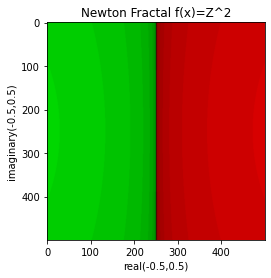

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


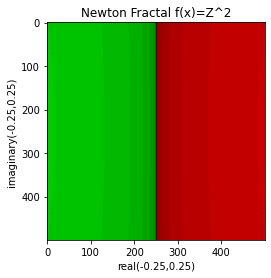

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


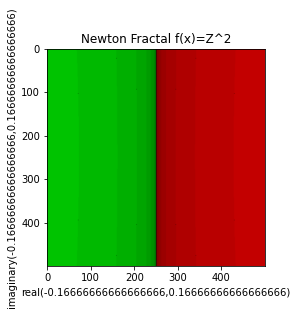

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


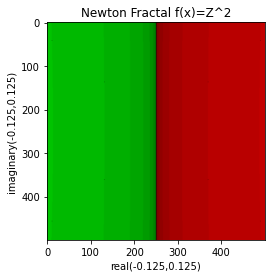

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


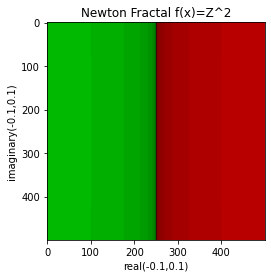

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


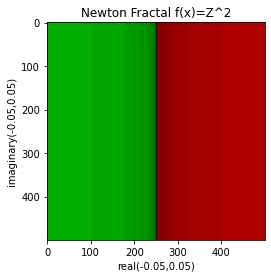

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


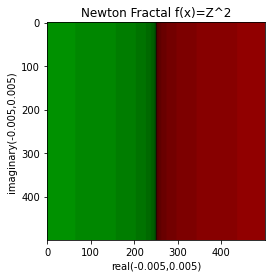

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


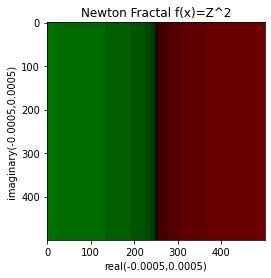

In [32]:
print("zoom in")
display1(zoom=1)
display1(zoom=1/2)
display1(zoom=1/3)
display1(zoom=1/4)
display1(zoom=1/5)
display1(zoom=1/10)
display1(zoom=1/100)
display1(zoom=1/1000)

## **4. Newton Iterates**

### Newton iterates form $z=10.0 + 0.0j$

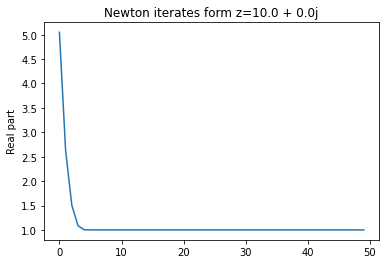

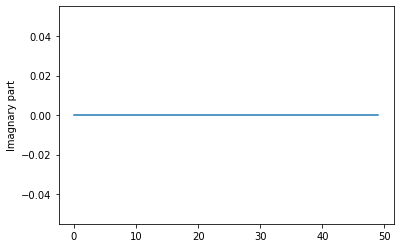

In [33]:
z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

### Newton iterates form $z=-10.0 + 0.0j$

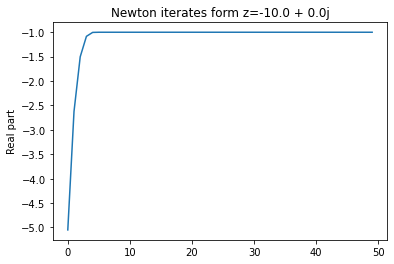

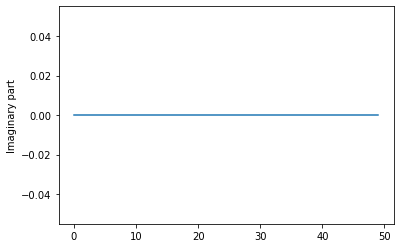

In [34]:
z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

### Newton iterates form $z=0.0 + 10.0j$

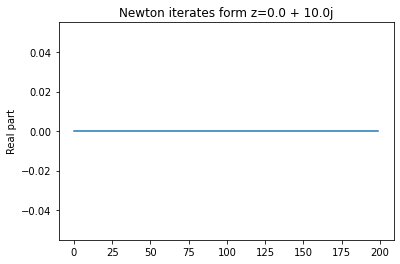

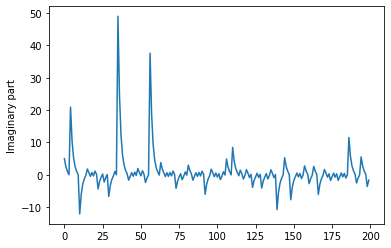

In [35]:
z=-0.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

### Newton iterates form $z=0.0 - 10.0j$

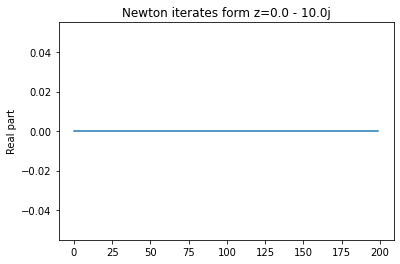

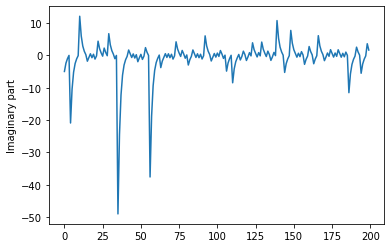

In [36]:
z=-0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

### Newton iterates form $z=0.0 + 0.0j$

In [37]:
z=-0.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

ZeroDivisionError: ignored

# $x^2+1$

In [38]:
def f(z):
    return z ** 2 + 1

def df(z):
    return 2 * z

## **1. Function Plot**

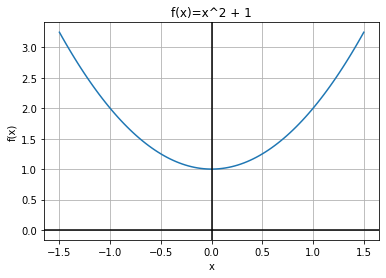

In [39]:
x = np.linspace(-1.5,1.5,100)
fig, ax = plt.subplots()
ax.plot(x,f(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=x^2 + 1')
plt.xlabel('x')
plt.ylabel('f(x)');




## **2. Classic & Po-Shen Loh's Methods**

In [40]:
a = 1
b = 0
c = 1

In [41]:
# Solutions

s1A = classic(a,b,c)[0]
s2A = classic(a,b,c)[1]

s1B = poshenlo(b)[0]
s2B = poshenlo(b)[1]

if (s1A != s2A):
  print('Solutions using Classic Method:\n{0}\n{1}\n'.format(s1A,s2A))
  print('Solutions using Po-Shen Loh\'s Method:\n{0}\n{1}'.format(s1B,s2B))
else:
  print('Solution using Classic Method:\n{0}\n'.format(s1A))
  print('Solution using Po-Shen Loh\'s Method:\n{0}'.format(s1B))


Solutions using Classic Method:
-1j
1j

Solutions using Po-Shen Loh's Method:
-1j
1j


## **3. Newton Fractals**

zoom out
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


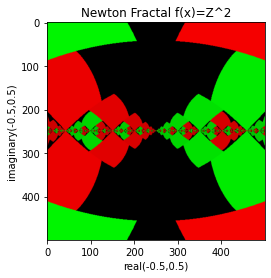

Z region from ( -1.0 , -1.0 ) to ( 1.0 , 1.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


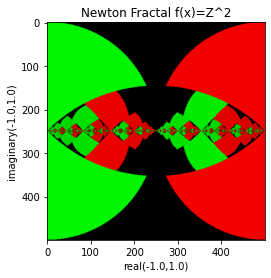

Z region from ( -1.5 , -1.5 ) to ( 1.5 , 1.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


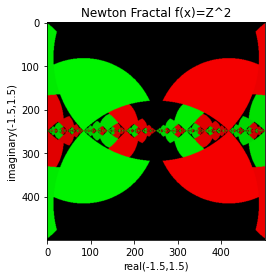

Z region from ( -2.0 , -2.0 ) to ( 2.0 , 2.0 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


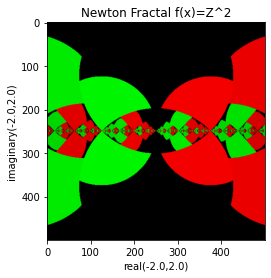

Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


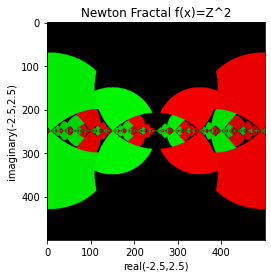

In [42]:
print("zoom out")
display1(zoom=1, eps = 1)
display1(zoom=2, eps = 1)
display1(zoom=3, eps = 1)
display1(zoom=4, eps = 1)
display1(zoom=5, eps = 1)

zoom in
Z region from ( -0.5 , -0.5 ) to ( 0.5 , 0.5 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


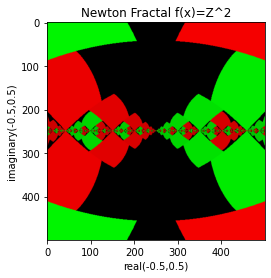

Z region from ( -0.25 , -0.25 ) to ( 0.25 , 0.25 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


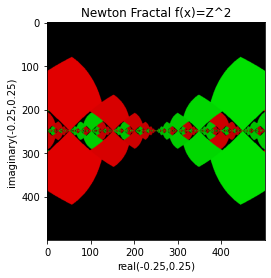

Z region from ( -0.16666666666666666 , -0.16666666666666666 ) to ( 0.16666666666666666 , 0.16666666666666666 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


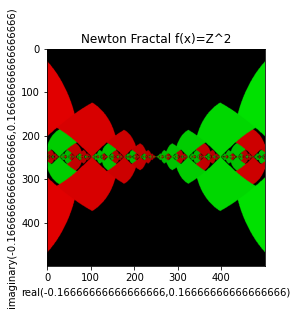

Z region from ( -0.125 , -0.125 ) to ( 0.125 , 0.125 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


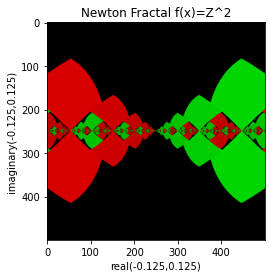

Z region from ( -0.1 , -0.1 ) to ( 0.1 , 0.1 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


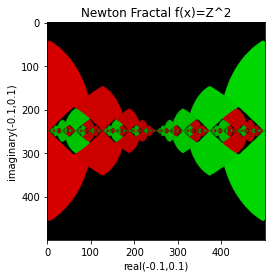

Z region from ( -0.05 , -0.05 ) to ( 0.05 , 0.05 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


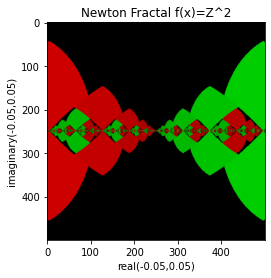

Z region from ( -0.005 , -0.005 ) to ( 0.005 , 0.005 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


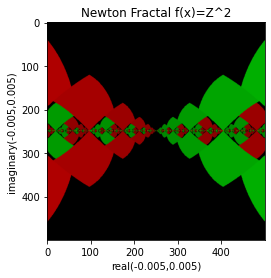

Z region from ( -0.0005 , -0.0005 ) to ( 0.0005 , 0.0005 )


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


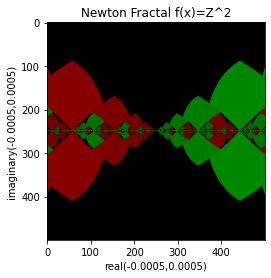

In [43]:
print("zoom in")
display1(zoom=1, eps=1)
display1(zoom=1/2, eps=1)
display1(zoom=1/3, eps=1)
display1(zoom=1/4, eps=1)
display1(zoom=1/5, eps=1)
display1(zoom=1/10, eps=1)
display1(zoom=1/100, eps=1)
display1(zoom=1/1000, eps=1)

## **4. Newton Iterates**

### Newton iterates form $z=10.0 + 0.0j$

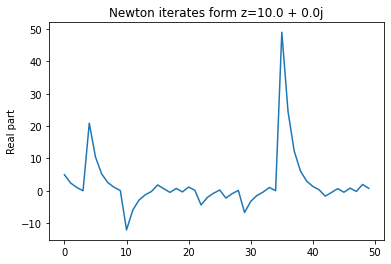

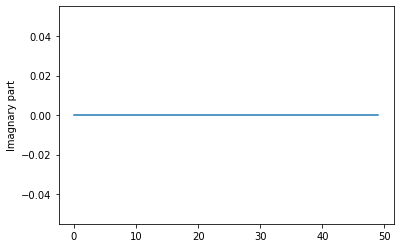

In [44]:
z=10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

### Newton iterates form $z=-10.0 + 0.0j$

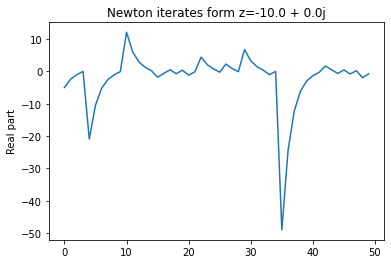

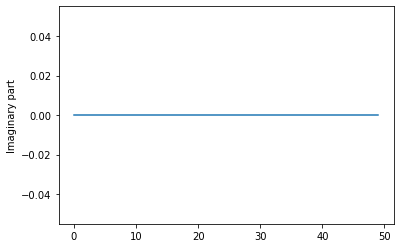

In [45]:
z=-10.0 + 0.0j
r=[]
i=[]
for k in range(50):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=-10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

### Newton iterates form $z=0.0 + 10.0j$

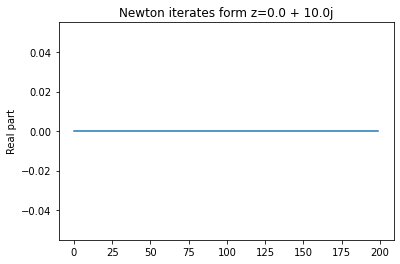

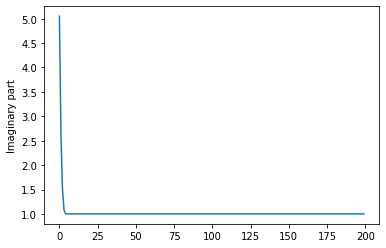

In [46]:
z=-0.0 + 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 + 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

### Newton iterates form $z=0.0 - 10.0j$

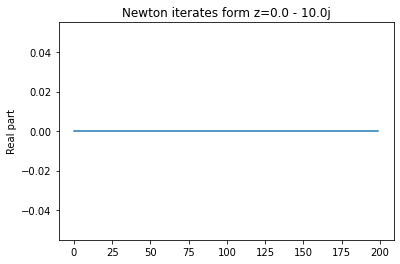

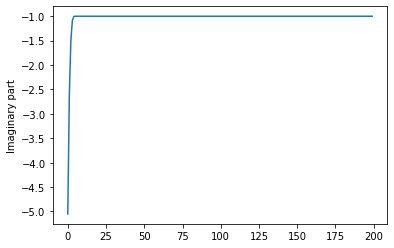

In [47]:
z=-0.0 - 10.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.title('Newton iterates form z=0.0 - 10.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

### Newton iterates form $z=0.0 + 0.0j$

In [48]:
z=-0.0 + 0.0j
r=[]
i=[]
for k in range(200):
  dz = df(z)
  z = z - f(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imaginary part')
plt.show()

ZeroDivisionError: ignored